In [1]:
print("Hello World")

Hello World


In [2]:
from R2CCP.main import R2CCP

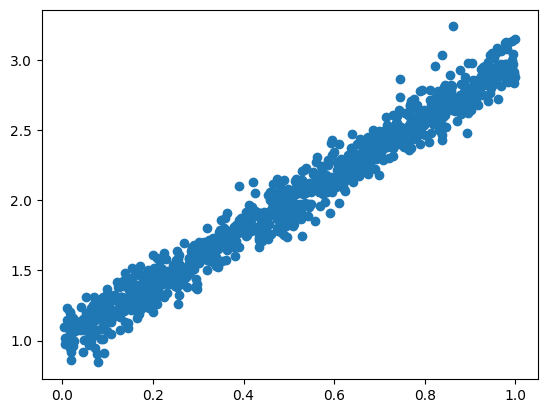

In [3]:
import numpy as np

X_train = np.random.rand(1000, 1)
Y_train = 2 * X_train + 1 + 0.1 * np.random.randn(1000, 1)
X_test = np.random.rand(100, 1)
Y_test = 2 * X_test + 1 + 0.1 * np.random.randn(100, 1)
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train)

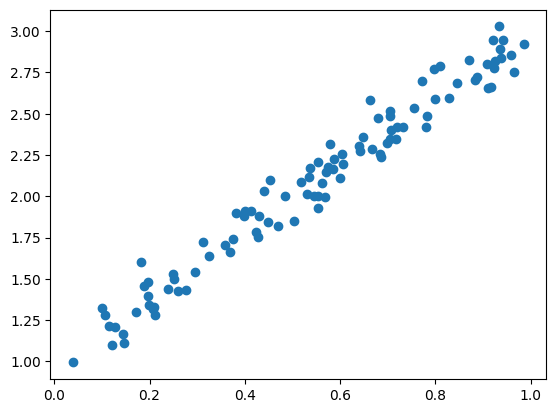

In [4]:
plt.scatter(X_test, Y_test)

In [6]:
model = R2CCP({'model_path':'./model_01', 'max_epochs':30})
model.fit(X_train, Y_train)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-08-28 15:16:50.996814: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-28 15:16:51.374846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following inst

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
intervals = model.get_intervals(X_test)
coverage, length = model.get_coverage_length(X_test, Y_test)
predictions = model.predict(X_test)
print(f"Coverage: {np.mean(coverage)}, Length: {np.mean(length)}")

Coverage: 0.9, Length: 0.32801689743995666


In [8]:
pred = [model.get_intervals([test]) for test in X_test]
pred

[[[(1.6894522905349731, 2.0075583457946777)]],
 [[(2.5683810710906982, 2.904850482940674)]],
 [[(1.0894110202789307, 1.445844292640686)]],
 [[(2.4687066078186035, 2.8108320236206055)]],
 [[(1.144180417060852, 1.484424114227295)]],
 [[(2.5905566215515137, 2.934292793273926)]],
 [[(2.6924335956573486, 3.0347084999084473)]],
 [[(1.256171464920044, 1.5709081888198853)]],
 [[(1.9514306783676147, 2.2886126041412354)]],
 [[(2.2228527069091797, 2.5428998470306396)]],
 [[(1.1349796056747437, 1.4783788919448853)]],
 [[(1.6509993076324463, 1.9611272811889648)]],
 [[(1.9977465867996216, 2.323265552520752)]],
 [[(2.3795642852783203, 2.705585479736328)]],
 [[(2.4324755668640137, 2.7724835872650146)]],
 [[(1.0603828430175781, 1.4210333824157715)]],
 [[(1.9234817028045654, 2.2541680335998535)]],
 [[(2.7204506397247314, 3.0513134002685547)]],
 [[(1.8786200284957886, 2.1971631050109863)]],
 [[(1.7067424058914185, 2.0281805992126465)]],
 [[(1.206087589263916, 1.5219465494155884)]],
 [[(1.9400041103363037

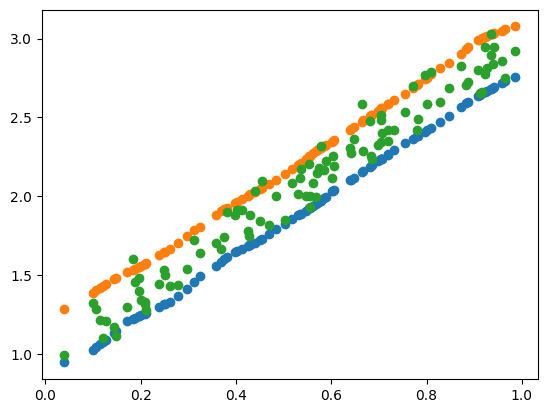

In [9]:
lower = [p[0][0][0] for p in pred]
upper = [p[0][0][1] for p in pred]
plt.scatter(X_test, lower)
plt.scatter(X_test, upper)
plt.scatter(X_test, Y_test)